In [43]:
pwd

'C:\\Users\\love'

In [13]:
!pip install pandas matplotlib seaborn

In [18]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the Data
# Load the dataset
data = pd.read_csv('sleep_cycle_productivity.csv')

# Display the first few rows of the dataset
data.head()

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,4/12/2024,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,11/4/2024,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,8/31/2024,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2/22/2024,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2/23/2024,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [22]:
# Data Cleaning (if necessary)
# Check for missing values
print(data.isnull().sum())

# Optionally, drop missing values or fill them
data.dropna(inplace=True)  # Example: dropping rows with missing values


Date                             0
Person_ID                        0
Age                              0
Gender                           0
Sleep Start Time                 0
Sleep End Time                   0
Total Sleep Hours                0
Sleep Quality                    0
Exercise (mins/day)              0
Caffeine Intake (mg)             0
Screen Time Before Bed (mins)    0
Work Hours (hrs/day)             0
Productivity Score               0
Mood Score                       0
Stress Level                     0
dtype: int64


In [26]:

# Summary statistics
summary = data.describe()
print(summary)

# Check the data types of each column
print(data.dtypes)

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation = numeric_data.corr()
print(correlation)

         Person_ID          Age  Sleep Start Time  Sleep End Time  \
count  5000.000000  5000.000000       5000.000000     5000.000000   
mean   5527.152200    38.590600         22.005350        4.980262   
std    2595.391771    12.302799          1.157591        1.862508   
min    1000.000000    18.000000         20.000000        0.560000   
25%    3258.000000    28.000000         21.020000        3.660000   
50%    5603.000000    39.000000         22.020000        4.970000   
75%    7749.500000    49.000000         23.000000        6.310000   
max    9998.000000    59.000000         23.980000        9.420000   

       Total Sleep Hours  Sleep Quality  Exercise (mins/day)  \
count        5000.000000    5000.000000          5000.000000   
mean            6.974902       5.520800            43.962600   
std             1.454033       2.863845            25.798541   
min             4.500000       1.000000             0.000000   
25%             5.690000       3.000000            22.0000

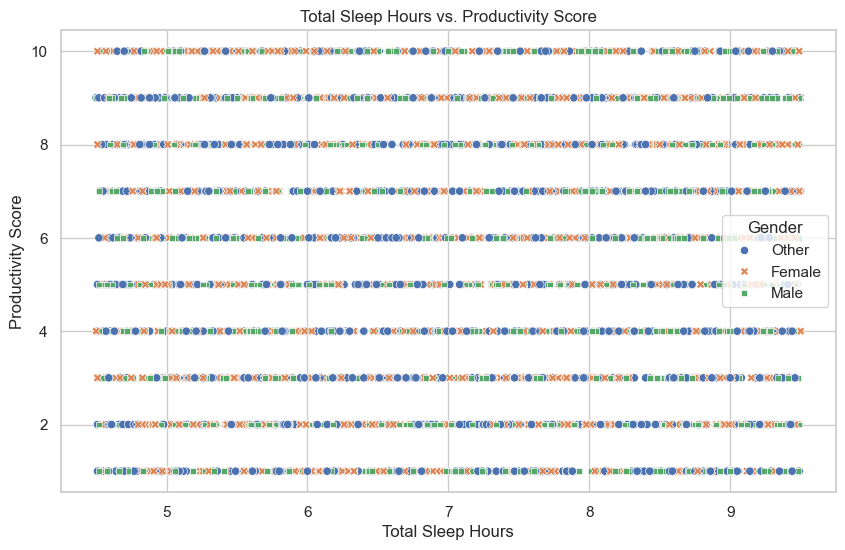

In [28]:
# Create a Scatter Plot
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a scatter plot of Total Sleep Hours vs. Productivity Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total Sleep Hours', y='Productivity Score', hue='Gender', style='Gender', palette='deep')

# Adding titles and labels
plt.title('Total Sleep Hours vs. Productivity Score')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Productivity Score')
plt.legend(title='Gender')
plt.grid(True)
plt.show()



In [30]:
# Cell 7: Save the Figure (optional)
# Save the plot
plt.savefig('sleep_vs_productivity_scatter.png')

<Figure size 640x480 with 0 Axes>

Mean Squared Error: 8.088649641661986
R^2 Score: -0.00044843919597337134


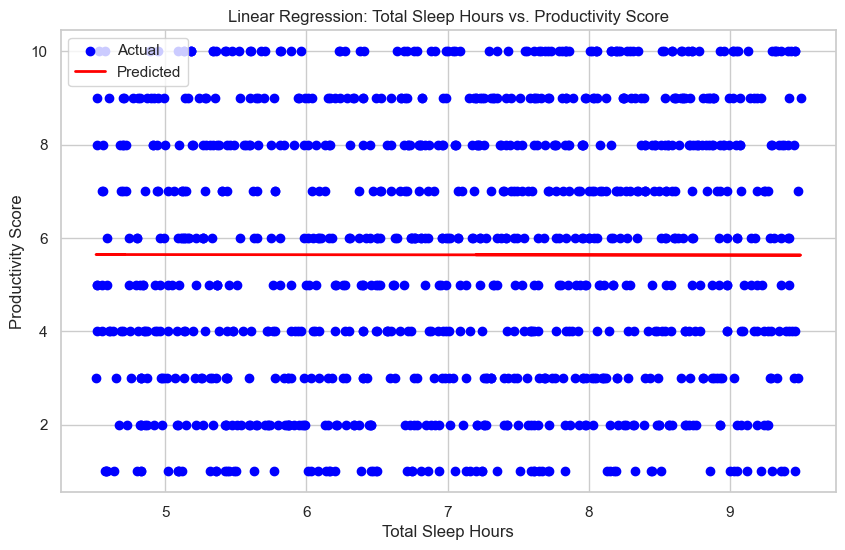

In [32]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
# Assuming 'Total Sleep Hours' is the predictor and 'Productivity Score' is the target
X = data[['Total Sleep Hours']]  # Predictor
y = data['Productivity Score']    # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Total Sleep Hours vs. Productivity Score')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Productivity Score')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Mean Squared Error: 8.680917795418473
R^2 Score: -0.07370352745056152


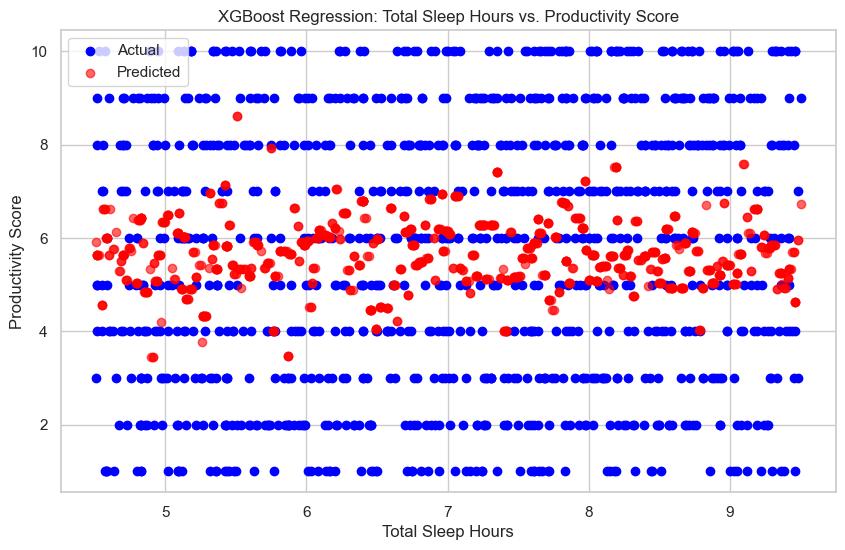

In [36]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the data
X = data[['Total Sleep Hours']]  # Predictor
y = data['Productivity Score']    # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.title('XGBoost Regression: Total Sleep Hours vs. Productivity Score')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Productivity Score')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\love\anacon\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:26:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\love\anacon\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


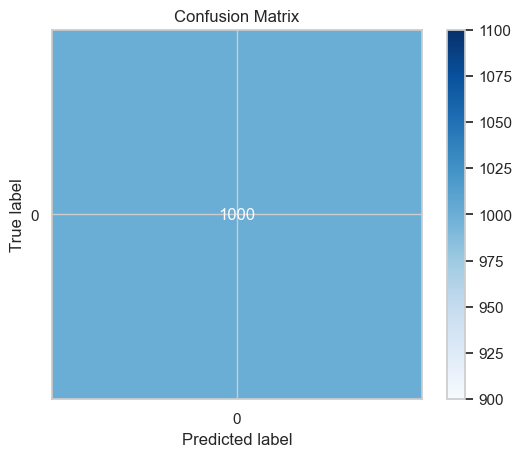

In [38]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prepare the data for classification
# Assuming 'Productivity Score' is converted to a binary classification target
# For example, let's say we classify scores above a certain threshold as 1 and others as 0
threshold = 50  # Example threshold
y_binary = (data['Productivity Score'] > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create and fit a classification model (e.g., XGBoost for classification)
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

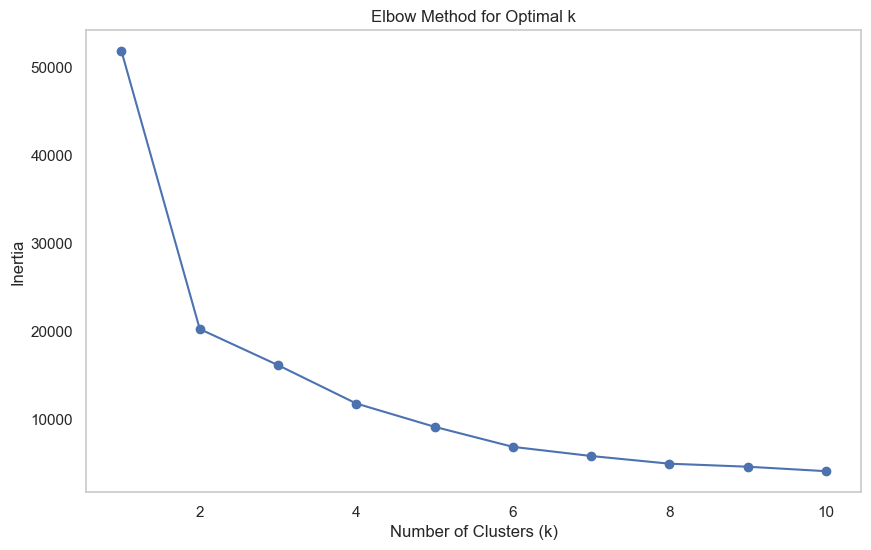

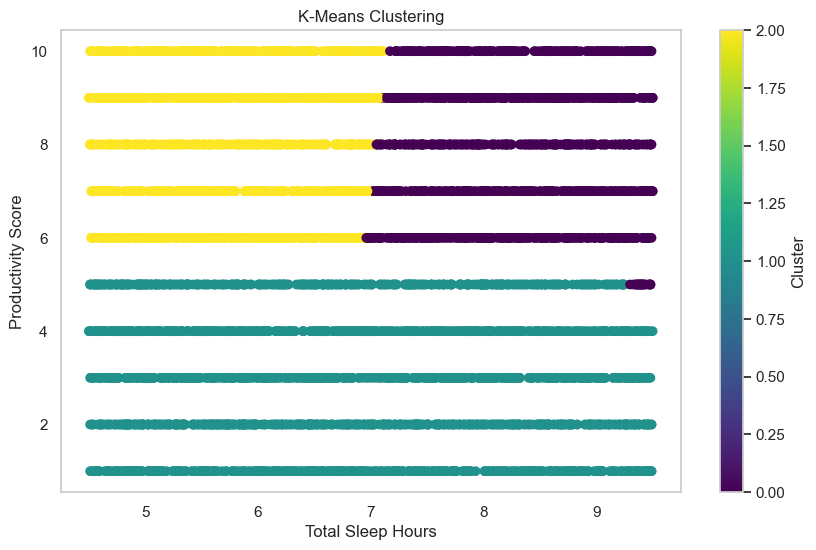

In [40]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare your data (using only numeric features)
X = data[['Total Sleep Hours', 'Productivity Score']]  # Adjust features as necessary

# Determine the optimal number of clusters (k) using the Elbow method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Fit K-Means with the chosen number of clusters (e.g., k=3)
optimal_k = 3  # Adjust based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Sleep Hours'], data['Productivity Score'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Total Sleep Hours')
plt.ylabel('Productivity Score')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()